In [61]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import IESDS
import order_k
import BFPSNS
import Linear_programming
import support_enumeration as se

import nashpy as nash


## 1.

In [62]:
# Parametre
c_1 = 1/10
c_2 = 2/10

def price(qi, qj):
    return 1 / np.sqrt(qi + qj)

def profit(qi, qj, c):
    return (price(qi, qj,) - c) * qi

# Eksempel på simultant prisvektor (startværdi)
q0 = np.array([0.5, 0.5])

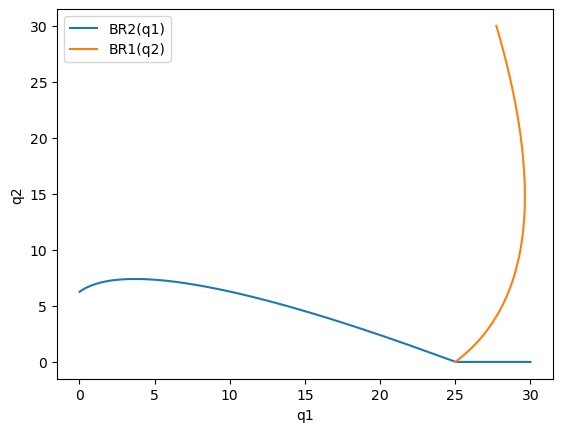

Nash-mængder: q1* ≈ 24.9138, q2* ≈ -0.2072
Profit firma 1: π1* ≈ 2.5209
Profit firma 2: π2* ≈ -0.0002


C:\Users\elias\AppData\Local\Temp\ipykernel_42736\3901215535.py:6: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(qi + qj)


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, fsolve

# Firma 2’s best–response: maksimer over q2 givet q1
def BR2(q1, c=c_2):
    f = lambda q2: -profit(q2, q1, c)      # qi = q2, qj = q1
    res = minimize(f, x0=q0[1], bounds=[(1e-6, None)])
    return res.x[0]

# Firma 1’s best–response: maksimer over q1 givet q2
def BR1(q2, c=c_1):
    f = lambda q1: -profit(q1, q2, c)      # qi = q1, qj = q2
    res = minimize(f, x0=q0[0], bounds=[(1e-6, None)])
    return res.x[0]

# Tegn BR-kurver
qq = np.linspace(0.01, 30, 200)
qq1 = np.array([BR1(q) for q in qq])
qq2 = np.array([BR2(q) for q in qq])

plt.plot(qq, qq2, label='BR2(q1)')
plt.plot(qq1, qq, label='BR1(q2)')
plt.legend()
plt.xlabel('q1')
plt.ylabel('q2')
plt.show()

# Løs systemet q1 = BR1(q2), q2 = BR2(q1)
def eq1(vars):
    q1, q2 = vars
    return q1 - BR1(q2)   # q1 = BR1(q2)

def eq2(vars):
    q1, q2 = vars
    return q2 - BR2(q1)   # q2 = BR2(q1)

# find (q1*, q2*) with fsolve på det samlede system
q1_star, q2_star = fsolve(lambda x: [eq1(x), eq2(x)], [0.5, 0.5])

print(f"Nash-mængder: q1* ≈ {q1_star:.4f}, q2* ≈ {q2_star:.4f}")
print(f"Profit firma 1: π1* ≈ {profit(q1_star, q2_star, c_1):.4f}")
print(f"Profit firma 2: π2* ≈ {profit(q2_star, q1_star, c_2):.4f}")


## 2.

In [64]:
def cartel_profit_a(x):
    p1, p2 = x
    return profit(p1, p2) + profit(p2, p1)

f = lambda x : -cartel_profit_a(x)
res_a = minimize(f, p0)

print(res_a.x)

TypeError: profit() missing 1 required positional argument: 'c'

## 3.

In [ ]:
#Profit i samarbejdsstadiet
print(profit(2.6789,2.6789))

#Profit i nashstadiet
print(profit(2.2327,2.2327))

#Profit i afvigelse for demand function a
from scipy.optimize import minimize_scalar

p_c = 2.6789

res_hat = minimize_scalar(
    lambda p: -profit(pi=p, pj=p_c),
    bounds=(0, 5),
    method='bounded'
)
print("Optimal price ved afvigelse:", res_hat.x)
pi_hat = profit(res_hat.x, pj=p_c)
pi_hat2 = profit(p_c, pj=res_hat.x)
print("Optimal pi ved afvigelse:", pi_hat)
print("Optimal pi ved afvigelse:", pi_hat2)

minimum_delta = (0.6036-0.5787)/(0.6036-0.5488)
print("Minimum delta for cooperation:", minimum_delta)

0.5787152317661052
0.5488240367649131
Optimal price ved afvigelse: 2.3177448175812914
Optimal pi ved afvigelse: 0.6036073421321408
Optimal pi ved afvigelse: 0.5279465111841259
Minimum delta for cooperation: 0.45437956204379565


## 4.

c:\Users\elias\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


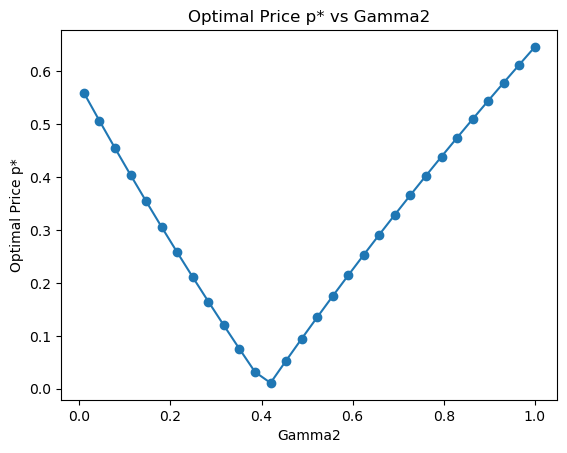

Optimal gamma2: 0.4197
Optimal gamma2 (scalar method): 0.4108


In [ ]:
gamma1_new = 1/10
def find_gamma_2(gamma2):
    def BR2(p1): 
        f = lambda p2 : -profit(pi=p2, pj=p1, gamma1=gamma1_new, gamma2=gamma2)
        res = minimize(f, p0[1])
        p2 = res.x[0]
        return p2
        
    def BR1(p2):
        f = lambda p1 : -profit(pi=p1, pj=p2, gamma1=gamma1_new, gamma2=gamma2)
        res = minimize(f, p0[0])
        p1 = res.x[0]
        return p1
    
    def eq1(p):
        return p - BR1(p)

    # def eq2(p):
    #     return p - BR2(p)

    # find p*
    p_star1, = fsolve(eq1, 0.5)
    # p_star2, = fsolve(eq2, 0.5)
    # print(f"Symmetric Nash price: p* ≈ {p_star1:.4f}")
    # print(f"Symmetric Nash price: p* ≈ {p_star2:.4f}")
    # print(f"Symmetric profit: π* ≈ {profit(p_star1, p_star2):.4f}")
    return np.abs(2.2327 - p_star1)

# Test different values of gamma2
gamma2_values = np.linspace(0.01, 1.0, 30)
p_star_values = [find_gamma_2(g) for g in gamma2_values]
plt.plot(gamma2_values, p_star_values, marker='o')
plt.xlabel('Gamma2')
plt.ylabel('Optimal Price p*')
plt.title('Optimal Price p* vs Gamma2')
plt.show()


# Find the optimal gamma2 that minimizes the difference
optimal_gamma2 = gamma2_values[np.argmin(p_star_values)]

# Find the optimal gamma 2 that minimizes the difference with minize_scalar
optimal_gamma2_scalar = minimize_scalar(find_gamma_2, bounds=(0.01, 1.0), method='bounded').x
print(f"Optimal gamma2: {optimal_gamma2:.4f}")
print(f"Optimal gamma2 (scalar method): {optimal_gamma2_scalar:.4f}")

In [ ]:
gamma2_new = 0.4108
def cartel_profit_a(x):
    p1, p2 = x
    return profit(p1, p2, gamma1=gamma1_new, gamma2=gamma2_new) + profit(p2, p1, gamma1=gamma1_new, gamma2=gamma2_new)

f = lambda x : -cartel_profit_a(x)
res_a = minimize(f, p0)

print(res_a.x)

[2.70062659 2.70062659]


In [ ]:
#Profit i samarbejdsstadiet
pi_C = profit(2.7006,2.7006, gamma1=gamma1_new, gamma2=gamma2_new)
print(pi_C)

#Profit i nashstadiet
pi_NE = profit(2.2327,2.2327, gamma1=gamma1_new, gamma2=gamma2_new)
print(pi_NE)

#Profit i afvigelse for demand function a
from scipy.optimize import minimize_scalar

p_c = 2.7006

res_hat = minimize_scalar(
    lambda p: -profit(pi=p, pj=p_c),
    bounds=(0, 5),
    method='bounded'
)
print("Optimal price ved afvigelse:", res_hat.x)
pi_hat = profit(res_hat.x, pj=p_c, gamma1=gamma1_new, gamma2=gamma2_new)
pi_hat2 = profit(p_c, pj=res_hat.x, gamma1=gamma1_new, gamma2=gamma2_new)
print("Optimal pi ved afvigelse:", pi_hat)
print("Optimal pi ved afvigelse:", pi_hat2)

minimum_delta = (pi_hat-pi_C)/(pi_hat-pi_NE)
print("Minimum delta for cooperation:", minimum_delta)

0.5351749406426858
0.5039457002332288
Optimal price ved afvigelse: 2.3213588409711843
Optimal pi ved afvigelse: 0.5612550312980253
Optimal pi ved afvigelse: 0.4835920321242746
Minimum delta for cooperation: 0.455075816987852


## 5.

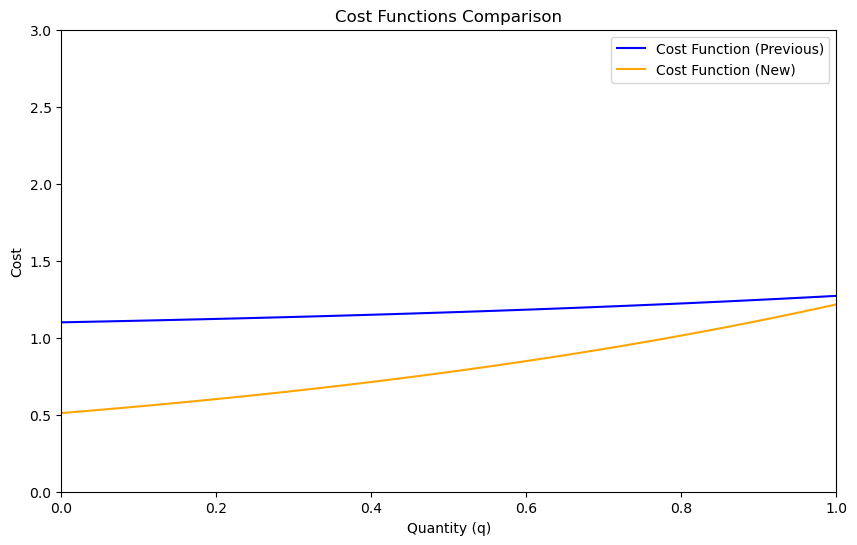

In [ ]:
def cost_prev(q):
    return 1 + (1/10) * np.exp(q)

def cost_new(q):
    return (1/10) + 0.4108 * np.exp(q)

#plotting cost functions
q_values = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))
plt.plot(q_values, cost_prev(q_values), label='Cost Function (Previous)', color='blue')
plt.plot(q_values, cost_new(q_values), label='Cost Function (New)', color='orange')
plt.title('Cost Functions Comparison')
plt.xlabel('Quantity (q)')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.legend()
plt.show()